<a href="https://colab.research.google.com/github/LikithLakkoju/oibsip_task5/blob/main/oasis_task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SALES PREDICTION USING PYTHON**

In [101]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from sklearn.metrics import mean_absolute_error, mean_squared_error,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [102]:
sale = pd.read_csv('/content/Advertising.csv')
sale

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [103]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [104]:
sale.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [105]:
sale.drop(["Unnamed: 0"],axis=1,inplace=True)
sale.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [106]:
sale.shape

(200, 4)

In [107]:
scale = StandardScaler()
sale[['TV','Radio','Newspaper']] = scale.fit_transform(sale[['TV','Radio','Newspaper']])
sale

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,22.1
1,-1.197376,1.082808,0.669579,10.4
2,-1.516155,1.528463,1.783549,9.3
3,0.052050,1.217855,1.286405,18.5
4,0.394182,-0.841614,1.281802,12.9
...,...,...,...,...
195,-1.270941,-1.321031,-0.771217,7.6
196,-0.617035,-1.240003,-1.033598,9.7
197,0.349810,-0.942899,-1.111852,12.8
198,1.594565,1.265121,1.640850,25.5


In [108]:
x=sale.drop('Sales',axis=1)
y=sale['Sales']

In [109]:
print(x)

           TV     Radio  Newspaper
0    0.969852  0.981522   1.778945
1   -1.197376  1.082808   0.669579
2   -1.516155  1.528463   1.783549
3    0.052050  1.217855   1.286405
4    0.394182 -0.841614   1.281802
..        ...       ...        ...
195 -1.270941 -1.321031  -0.771217
196 -0.617035 -1.240003  -1.033598
197  0.349810 -0.942899  -1.111852
198  1.594565  1.265121   1.640850
199  0.993206 -0.990165  -1.005979

[200 rows x 3 columns]


In [110]:

print(y)

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64


In [111]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)

In [112]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [113]:
expected=y_train
predicted=model.predict(x_test)
predicted

array([17.09777441, 16.86148273, 21.7761552 , 24.53812602, 12.32008724,
       20.9083371 , 10.09857022, 12.38326275, 12.01767713, 16.939182  ,
       22.8039863 , 15.18438755,  8.45988902, 14.86958246, 18.5360064 ,
       18.5391287 , 18.67614759, 14.5131948 ,  9.74192603, 20.57441729,
       14.89243548, 17.70102466, 23.04193509,  7.718106  , 21.42075683,
       19.62792915, 13.79733409, 11.63827129, 18.42655599, 12.19463761,
       11.40777433,  9.96083851, 13.49436555, 15.18912412, 18.09830593,
        6.92815403, 14.21050378, 14.27217178, 14.10451207, 10.77723418,
       14.82936609, 11.96507878, 10.69651541, 10.40851022,  6.21159776,
       16.82112487, 16.4659736 , 12.07626636, 10.75281419, 20.84690688,
       15.09266208, 15.39499668, 13.27964587, 14.1081843 , 12.38574411,
        9.03289588, 20.48246311,  9.3517132 ,  5.36311192,  8.24848891])

In [114]:
print(mean_absolute_error(y_true=y_test, y_pred=predicted))
print(mean_squared_error(y_true=y_test, y_pred=predicted))

1.2111525124980482
2.2237746679115573


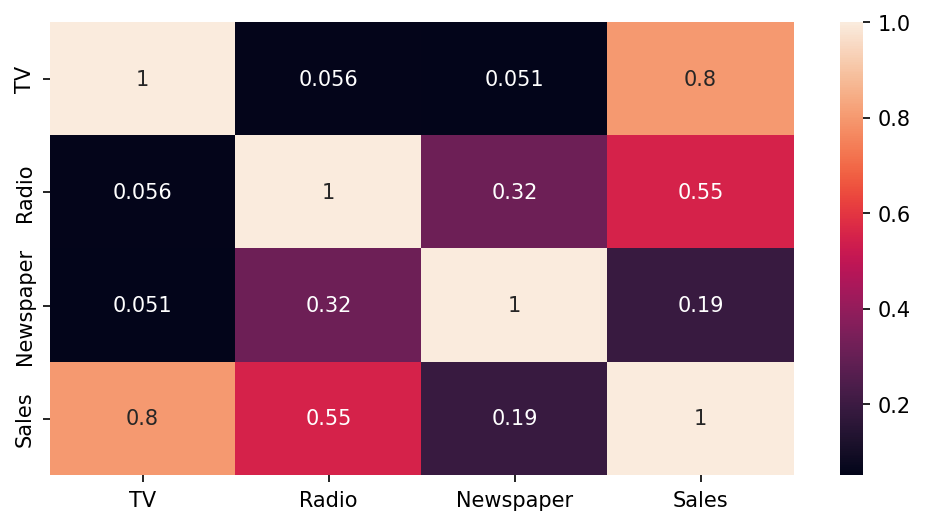

In [115]:
import seaborn as sns
plt.figure(figsize=(8, 4), dpi=150)
sns.heatmap(sale.corr(method='spearman'), annot = True)
plt.show()

In [116]:
input_values=[['0.969852','0.981522','1.778945']]
#STANDARDIZING VALUES
input_values=scale.fit_transform(input_values)
#MAKING PREDICTION
prediction=model.predict(input_values)
prediction

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([14.04727676])